In [19]:
#Importaciones Basicas
import pandas as pd
import seaborn as sns

# Preprocesamiento y Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

#Modelos de ML
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Metricas de valoración
from sklearn.metrics import f1_score, r2_score, recall_score, precision_score, confusion_matrix

# Guardar Modelo
import pickle

In [20]:
df = pd.read_csv("../data/processed/fraud_processed.csv")

In [21]:
df["category"].unique()

array(['misc_net', 'grocery_pos', 'entertainment', 'gas_transport',
       'misc_pos', 'grocery_net', 'shopping_net', 'shopping_pos',
       'food_dining', 'personal_care', 'health_fitness', 'travel',
       'kids_pets', 'home'], dtype=object)

In [22]:
df

,category,amt,gender,state,city_pop,is_fraud,weekday_name,hour_sin,hour_cos,age,sector
0,misc_net,4.97,1,NC,3495,0,Tuesday,0.000000e+00,1.0,30,Servicios Sociales y Comunitarios
1,grocery_pos,107.23,1,WA,149,0,Tuesday,0.000000e+00,1.0,40,Educación e Investigación
2,entertainment,220.11,0,others,4154,0,Tuesday,0.000000e+00,1.0,56,Servicios Sociales y Comunitarios
3,gas_transport,45.00,0,others,1939,0,Tuesday,0.000000e+00,1.0,52,Legal y Regulador
4,misc_pos,41.96,0,VA,99,0,Tuesday,0.000000e+00,1.0,32,other
...,...,...,...,...,...,...,...,...,...,...,...
1296670,entertainment,15.56,0,others,258,0,Sunday,1.224647e-16,-1.0,58,Ciencias Ambientales y Naturales
1296671,food_dining,51.70,0,MD,100,0,Sunday,1.224647e-16,-1.0,40,Medios y Comunicación
1296672,food_dining,105.93,0,NM,899,0,Sunday,1.224647e-16,-1.0,52,Ingeniería y Construcción
1296673,food_dining,74.90,0,others,1126,0,Sunday,1.224647e-16,-1.0,39,Servicios Sociales y Comunitarios


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 11 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   category      1296675 non-null  object 
 1   amt           1296675 non-null  float64
 2   gender        1296675 non-null  int64  
 3   state         1296675 non-null  object 
 4   city_pop      1296675 non-null  int64  
 5   is_fraud      1296675 non-null  int64  
 6   weekday_name  1296675 non-null  object 
 7   hour_sin      1296675 non-null  float64
 8   hour_cos      1296675 non-null  float64
 9   age           1296675 non-null  int64  
 10  sector        1296675 non-null  object 
dtypes: float64(3), int64(4), object(4)
memory usage: 108.8+ MB


In [24]:
df.describe(include='all')

,category,amt,gender,state,city_pop,is_fraud,weekday_name,hour_sin,hour_cos,age,sector
count,1296675,1.296675e+06,1.296675e+06,1296675,1.296675e+06,1.296675e+06,1296675,1.296675e+06,1.296675e+06,1.296675e+06,1296675
unique,14,NaN,NaN,37,NaN,NaN,7,NaN,NaN,NaN,17
top,gas_transport,NaN,NaN,others,NaN,NaN,Monday,NaN,NaN,NaN,other
freq,131659,NaN,NaN,105674,NaN,NaN,254282,NaN,NaN,NaN,235862
mean,NaN,7.035104e+01,5.474487e-01,NaN,8.882444e+04,5.788652e-03,NaN,-1.366887e-01,-1.406000e-02,4.552822e+01,NaN
std,NaN,1.603160e+02,4.977437e-01,NaN,3.019564e+05,7.586269e-02,NaN,6.932213e-01,7.075051e-01,1.740895e+01,NaN
min,NaN,1.000000e+00,0.000000e+00,NaN,2.300000e+01,0.000000e+00,NaN,-1.000000e+00,-1.000000e+00,1.300000e+01,NaN
25%,NaN,9.650000e+00,0.000000e+00,NaN,7.430000e+02,0.000000e+00,NaN,-8.660254e-01,-7.071068e-01,3.200000e+01,NaN
50%,NaN,4.752000e+01,1.000000e+00,NaN,2.456000e+03,0.000000e+00,NaN,-2.588190e-01,-1.836970e-16,4.400000e+01,NaN
75%,NaN,8.314000e+01,1.000000e+00,NaN,2.032800e+04,0.000000e+00,NaN,5.000000e-01,7.071068e-01,5.700000e+01,NaN


In [25]:
X = df.drop(["is_fraud"], axis=1)
y = df["is_fraud"]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [27]:
categorical_cols = ["category", "state", "weekday_name", "sector"]
numeric_cols = ["amt", "gender", "city_pop", "hour_sin", "hour_cos", "age"]

In [28]:
preprocessor = ColumnTransformer(transformers=[
    ("category", OneHotEncoder(), categorical_cols),
    ("numerical", MinMaxScaler(), numeric_cols)   
])

In [29]:
# Logistic regression
log_reg = Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("classifier", LogisticRegression())
])

log_reg_param = {
    'classifier__C': [0.01, 0.1, 1, 10],
    'classifier__penalty': ['l2'],
    'classifier__class_weight': ['balanced'],
    'classifier__solver': ['liblinear']
}

log_reg_gs = GridSearchCV(
    log_reg,
    log_reg_param,
    cv=5,
    n_jobs=-1
)

# Random Forest Classifier
rand_for = Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("classifier", RandomForestClassifier())
])

rand_for_param = {
    "classifier__max_depth": [5,7,10],
    "classifier__n_estimators": [100,300, 500]
}

rand_for_gs = GridSearchCV(
    rand_for,
    rand_for_param,
    cv=3,
    n_jobs=-1
)

# XGBClassifier
xgbc = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", XGBClassifier())
])

xgbc_param = {
    "classifier__n_estimators": [400],  # 400     # Más árboles puede ayudar a capturar patrones
    "classifier__max_depth": [7],         # 5     # Profundizar un poco más puede mejorar recall
    "classifier__learning_rate": [0.05],     # Tasas más bajas para entrenar más suave y mejor generalización
    "classifier__scale_pos_weight": [10], # Importante para desbalance, aumenta peso a la clase fraudulenta
    "classifier__subsample": [1.0],          # Para regularización y evitar overfitting
    "classifier__colsample_bytree": [0.8],   # Igual que subsample, mejora diversidad árboles
    "classifier__min_child_weight": [1] 
}

xgbc_gs = GridSearchCV(
    xgbc,
    xgbc_param,
    cv= 10,
    n_jobs = -1
)

In [30]:
#log_reg_gs.fit(X_train, y_train)
#rand_for_gs.fit(X_train, y_train)
xgbc_gs.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('category',
                                                                         OneHotEncoder(),
                                                                         ['category',
                                                                          'state',
                                                                          'weekday_name',
                                                                          'sector']),
                                                                        ('numerical',
                                                                         MinMaxScaler(),
                                                                         ['amt',
                                                                          'gender',
                                                                          'city_pop',
                                                                          'hour_sin',
                                                                          'hour_cos',
                                                                          'age'])])),
                                       ('classifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,...
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None, ...))]),
             n_jobs=-1,
             param_grid={'classifier__colsample_bytree': [0.8],
                         'classifier__learning_rate': [0.05],
                         'classifier__max_depth': [7],
                         'classifier__min_child_weight': [1],
                         'classifier__n_estimators': [400],
                         'classifier__scale_pos_weight': [10],
                         'classifier__subsample': [1.0]})

In [ ]:
print("Best Score: ", xgbc_gs.best_score_)
print("Best Estimator: ", xgbc_gs.best_params_)

Best Score:  0.9978725067583447
Best Estimator:  {'classifier__colsample_bytree': 0.8, 'classifier__learning_rate': 0.05, 'classifier__max_depth': 7, 'classifier__min_child_weight': 1, 'classifier__n_estimators': 400, 'classifier__scale_pos_weight': 10, 'classifier__subsample': 1.0}


In [38]:
"""
y_pred_log_reg_gs = log_reg_gs.predict(X_test)
print("f1_score", f1_score(y_test, y_pred_log_reg_gs))
print("r2_score", r2_score(y_test, y_pred_log_reg_gs))
print("recall_score", recall_score(y_test, y_pred_log_reg_gs))
print("precision_score", precision_score(y_test, y_pred_log_reg_gs))
print("Matrix confusion:")
print(confusion_matrix(y_test, y_pred_log_reg_gs))
print("*"*50)

y_pred_rand_for_gs = rand_for_gs.predict(X_test)

print("Metrics of RandomForest")
print("f1_score", f1_score(y_test, y_pred_rand_for_gs))
print("r2_score", r2_score(y_test, y_pred_rand_for_gs))
print("recall_score", recall_score(y_test, y_pred_rand_for_gs))
print("precision_score", precision_score(y_test, y_pred_rand_for_gs))
print("Matrix confusion:")
print(confusion_matrix(y_test, y_pred_rand_for_gs))
print("*"*50)

"""

y_pred_xgbc_gs = xgbc_gs.predict(X_test)

print("Metrics of XGBClassifier")
# F1-score mide qué tan bien el modelo equilibra detectar fraudes sin equivocarse demasiado.
print("f1_score", f1_score(y_test, y_pred_xgbc_gs))

# R2-score nos dice qué tan bien el modelo explica los datos, pero no es muy útil en clasificación.
print("r2_score", r2_score(y_test, y_pred_xgbc_gs))

# Recall es cuánto de los fraudes reales el modelo logra encontrar (no deja pasar muchos).
print("recall_score", recall_score(y_test, y_pred_xgbc_gs))

# Precision es cuántos de los avisos de fraude que da el modelo son realmente fraudes.
print("precision_score", precision_score(y_test, y_pred_xgbc_gs))

# Matriz de confusión muestra los aciertos y errores del modelo: cuántos fraudes detectó, cuántos se le escaparon y cuántos normales confundió.
print("Matrix confusion:")
print(confusion_matrix(y_test, y_pred_xgbc_gs))

print("*"*50)


Metrics of XGBClassifier
f1_score 0.8359814226350526
r2_score 0.6417608793129818
recall_score 0.9076433121019108
precision_score 0.7748074309016765
Matrix confusion:
[[321788    497]
 [   174   1710]]
**************************************************


In [ ]:
finish_model = "../models/finish_model.pkl"

with open(finish_model, "wb") as archivo_salida:
    pickle.dump(xgbc_gs.best_estimator_, archivo_salida)

In [ ]:
with open("../models/finish_model.pkl", "rb") as archivo_salida:
    mi_modelo = pickle.load(archivo_salida)

In [ ]:
df_test = pd.read_csv("../data/processed/fraud_test_processed.csv")

In [17]:
df_test

,category,amt,gender,state,city_pop,is_fraud,weekday_name,hour_sin,hour_cos,age,sector
0,personal_care,2.86,0,SC,333497,0,Sunday,1.224647e-16,-1.000000,52,Ingeniería y Construcción
1,personal_care,29.84,1,others,302,0,Sunday,1.224647e-16,-1.000000,30,Comercio y Ventas
2,health_fitness,41.28,1,NY,34496,0,Sunday,1.224647e-16,-1.000000,49,other
3,misc_pos,60.05,0,FL,54767,0,Sunday,1.224647e-16,-1.000000,32,Diseño y Arte
4,travel,3.19,0,MI,1126,0,Sunday,1.224647e-16,-1.000000,65,Diseño y Arte
...,...,...,...,...,...,...,...,...,...,...,...
555714,health_fitness,43.77,0,MO,519,0,Thursday,-2.588190e-01,0.965926,54,other
555715,kids_pets,111.84,0,TX,28739,0,Thursday,-2.588190e-01,0.965926,21,Finanzas y Contabilidad
555716,kids_pets,86.88,1,WA,3684,0,Thursday,-2.588190e-01,0.965926,39,Diseño y Arte
555717,travel,7.99,0,others,129,0,Thursday,-2.588190e-01,0.965926,55,other


In [18]:
is_fraud = mi_modelo.predict(df_test)

In [19]:
is_fraud.reshape(-1,1)

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [20]:
import numpy as np

unique, counts = np.unique(is_fraud, return_counts=True)
for label, count in zip(unique, counts):
    print(f"{label} → {count} casos → {round(count / len(is_fraud) * 100, 2)}%")


0 → 553650 casos → 99.63%
1 → 2069 casos → 0.37%


In [21]:
y_test.value_counts(normalize=True) * 100

is_fraud
0    99.421556
1     0.578444
Name: proportion, dtype: float64

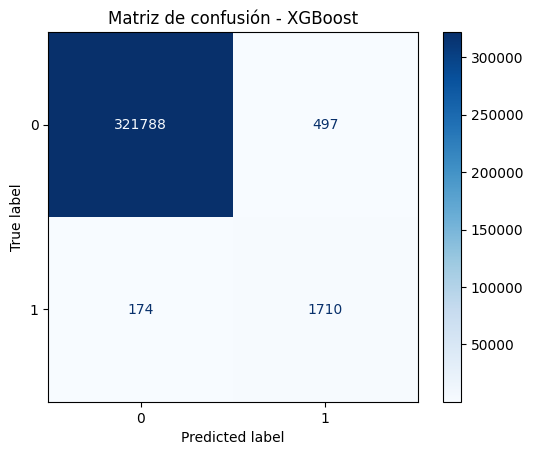

In [41]:
from sklearn.metrics import ConfusionMatrixDisplay

# Ya tienes y_pred_xgbc_gs y y_test
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_xgbc_gs, cmap="Blues")

plt.title("Matriz de confusión - XGBoost")
plt.show()
